## General Summary:

The aim of this project is to perform some data cleaning and exploratory work on the Titanic dataset. More information on the titanic dataset can be found here: https://www.kaggle.com/c/titanic/data. Information on variable descriptions can be found here: https://www.kaggle.com/c/titanic/data. Overall, this document will try to address the following:

- Is there a relatonsip between the probability of survival and gender. In particular, are women more likely to survive than men?
- Is there a relationship between passenger class (as a proxy for socio-economic status) and survival probability?
- Is there a relationship between age and probability of survival? Are children more likely to surive than adults?
- Is survival probability greater for people with larger families on board? For instance, is one more likely to survive if there are a larger number of parents, siblings, etc., on board?




### Libraries

In [1]:
##Import the pandas, numpy, seaborn, and matplotlib libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns


#set plot style
sns.set(style="ticks", color_codes=True)

#have the plots presented within the notebook
%matplotlib inline 


### Reading Data
The csv file is read localy using pandas.

In [2]:
titanic = pd.read_csv("titanic_data.csv")

#preview the first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
#preview the last 5 rows, just to check that the row structure is the same as for the first 5 rows. It could be that at the end
#the document has the row filled with notes unrelated to the dataset.
titanic.tail()
#everything looks good; the are no unrelated notes located at the end of the dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


### Examining the structure and relationships in the data
In this section, I will examine the following:

* The variable types. In other words, are the variables in their proper type (e.g., boolean, integer, float).
* The pattern of missing data and possible ways to deal with missing data.
* Descriptive statistics for sex, age, class, and family size.
* Plots visualizing the relationship between Surival Chance and sex, class, and age

In [4]:
#Are the variables in their proper types?
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Nothing seems to be out of the ordinary, except for the variable Pclass. The Pclass should be recoded into a factor variable. In the next chunk of code i recode the Pclass from int64 into an object class and rename the levels as follows:
* 1=First
* 2=Second
* 3=Third


In the next chunk of code, I also create a new variable called 'Total_Family' that will contain the sum of the 'SibSp' and 'Parch'. This variable will essentialy measure the number of family members that a person has on board the Titanic.

In [5]:
#recode the Pclass into a cetrgorical variable, with 3 levels. 
titanic.loc[titanic.Pclass==1, ['Pclass']]='First'
titanic.loc[titanic.Pclass==2, ['Pclass']]='Second'
titanic.loc[titanic.Pclass==3, ['Pclass']]='Third'

#create column for Total_Family
titanic['Total_Family']=titanic['SibSp']+titanic['Parch']


In [6]:
#Examine the pattern of missing data and descriptive stats
##first, let's make sure we have 891 unique passengers
len(list(titanic['PassengerId'].unique()))

891

In [7]:
#Let's examine descriptive stats for the colums survived, age, and total family
titanic[['Survived','Age','Total_Family']].describe()

,Survived,Age,Total_Family
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,0.904602
std,0.486592,14.526497,1.613459
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,0.000000
50%,0.000000,28.000000,0.000000
75%,1.000000,38.000000,1.000000
max,1.000000,80.000000,10.000000


It seems like only about 38.3% of the passengers survived. The average age of a passenger was close to 27 and a passenger had about .9 family members on board with them. Note also that we have the age values for only 177 passengers. The min and max in the graph also shows nothing out of the ordinary. The age ranges from several months to 80 years, and the family size ranges from no family on board to 10 family members on board. Very extreme max values (e.g., age of 230) would be a sign that there were some mistakes done during data logging.

In the next lines of code, I will examine the probability of survival and counts for Pclass and Sex.

In [8]:
#Group by class and find the average survival rate for each class and number of passengers in each class
byClass = titanic.groupby('Pclass', sort=True, as_index=False)
byClass['Survived'].agg([np.mean, len])

#it looks like the majority of the passengers were in the lower class. Moreover, it seems like there might be a relationship
#between class and survival, with higher class passengers being more likely to survive than lower class passengers.

Survived     
            mean  len
Pclass               
First   0.629630  216
Second  0.472826  184
Third   0.242363  491

In [9]:
#do the same thing for sex
bySex = titanic.groupby(['Sex'], sort=True)
bySex['Survived'].agg([np.mean, len])

#it seems like the majority of the passengers were males. 

,mean,len
Sex,,
female,0.742038,314
male,0.188908,577


Tables are not the best way to process information, so below I plot the relationship between survival probability, passenger class, and gender.

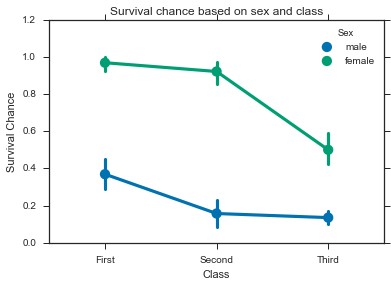

In [10]:
#set the color palette to colorblind
sns.set_palette(sns.color_palette('colorblind'))
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic, order=['First','Second','Third'],size=4, aspect=4);

plot.xlabel('Class')
plot.ylabel('Survival Chance')
plot.title('Survival chance based on sex and class')

Several things emerge from examining the graph above
* There is a very clear difference between males and females when it comes to answering who survived the Titanic crash. Females are more likely to have survived the crash in all classes.
* There also appears to be an overall higher chance of survival if one has higher Class. Notice that passengers in the Third class have a lower probability of surviving relative to passengers in the First class.
* There also appears to be an interaction between sex and class when it comes to survival chance. Males in the second and third classes had about similar chances of surviving, while males in the third class had higher survival chances. ON the other hand for females, the chances of survival for first and second clases were similar ot each other, while females in the third class have much smaller chance of surviving.

We know that there might be a relationship between survival chance, gender, and class. Below I examine if there is a relationship between survival probability and age. I expect that age would have an inverse relationship with survival probability (i.e., children are more likely to survive). 

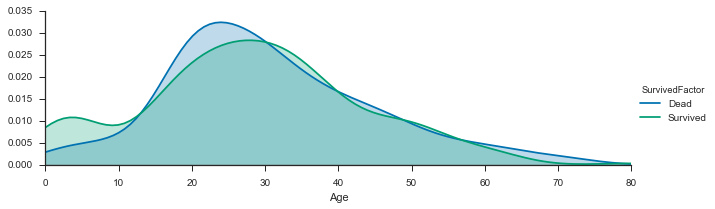

In [11]:
#Create a new column called SurvivedFactor 
titanic['SurvivedFactor']=titanic['Survived']
titanic.loc[titanic.SurvivedFactor==1, ['SurvivedFactor']]='Survived'
titanic.loc[titanic.SurvivedFactor==0, ['SurvivedFactor']]='Dead'



facet = sns.FacetGrid(titanic, hue="SurvivedFactor",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()


It seems like younger passengers are more likely to survive compared to adult passengers. Notice that the distribution of the survived passnegers has a higher density in the left side compared to the distribution of dead passengers.

What does the relationship between family size and survival looks like?

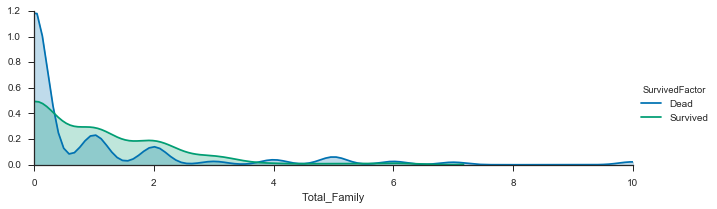

In [12]:
facet = sns.FacetGrid(titanic, hue="SurvivedFactor",aspect=3)
facet.map(sns.kdeplot,'Total_Family',shade= True)
facet.set(xlim=(0, titanic['Total_Family'].max()))
facet.add_legend()

It seems like being part of a larger family confers some benefits in surviving the catastrophe. It might be that this is due to the fact that families that stick together have a better chance of fighting for a spot in a safety boat. The motive could also be altruistic, with people who are single allowing the families to board first.

## Inferential Tests

Although the graphs above allow one to visualize the relationship between survival chance and gender, age, family size, and class, they do not provide a way to quantify the size and the statistical significance of that relationship. In order to do this, I will perform a logistic regression. The predicted variable will be `Survived`. The predictors will be `Age`,`Sex`,`Class`,`Total_Family`. When writing the code for this section, I relied on suggestions from yhat (http://blog.yhat.com/posts/logistic-regression-and-python.html).

In [13]:
#need to import statsmodels for this section
import statsmodels.api as sm

In [14]:
#we are going to create dummy variables for Pclass and Sex using the get_dummies function from pandas
dummy_class=pd.get_dummies(titanic['Pclass'])
dummy_sex=pd.get_dummies(titanic['Sex'])
print dummy_class.head()
print dummy_sex.head()

   First  Second  Third
0      0       0      1
1      1       0      0
2      0       0      1
3      1       0      0
4      0       0      1
   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1


In [15]:
#create a dataframe of predictor colums
columskept=['Survived','Age', 'Total_Family']
##attach the dummy colums for second and third class

data=titanic[columskept].join(dummy_class.ix[:,'Second':]).join(dummy_sex.ix[:,'male':])
#add an intercept
data['intercept'] = 1.0
#the Age variable contains NaN values, so we replace them with median age of 28
data["Age"][np.isnan(data["Age"])] = 28
print data.head()

   Survived  Age  Total_Family  Second  Third  male  intercept
0         0   22             1       0      1     1          1
1         1   38             1       0      0     0          1
2         1   26             0       0      1     0          1
3         1   35             1       0      0     0          1
4         0   35             0       0      1     1          1


C:\Users\Stas\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:

predictor_cols=data.columns[1:]
logit = sm.Logit(data['Survived'], data[predictor_cols])
#fit model
result = logit.fit()
#present summary of the model
print result.summary()

Optimization terminated successfully.
         Current function value: 0.444911
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Mar 2016   Pseudo R-squ.:                  0.3319
Time:                        19:13:19   Log-Likelihood:                -396.42
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 6.356e-83
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Age             -0.0391      0.008     -5.018      0.000        -0.054    -0.024
Total_Family    -0.2154

In [17]:
#convert the estimate to more interpretable values
print np.exp(abs(result.params))

Age              1.039884
Total_Family     1.240335
Second           3.221221
Third           10.477866
male            16.171085
intercept       56.400425
dtype: float64


The logistic regression model indicates that all relationships are significant.

## Summary of findings

Several interesting patterns were observed in the data
* Younger passengers were more likely to have survived the catastrope when compared to older passengers
* Passengers in the first class were more likely to have survived relative to passengers in the second and third class.
* Females had a higher survival chance relative to males
* Passengers with family on board were more likely to come out alive when compared to passengers with no family on board. 